In [1]:
from weight_save import WeightSaver

import nengo
import nengo_spa as spa
import numpy as np
import matplotlib.pyplot as plt
import random

seed=1
        
def a_f(t):
    if (t//0.2) % 2 == 0:
        return 'A'
    else:
        return 'B'
    
def expected_f(t):
    if (t//0.2) % 2 == 0:
        return 'C'
    else:
        return 'D'


In [2]:

        
np.random.seed(seed)
random.seed(seed)

load_weights = True
save_weights = True
D = 32
T=2

vocab = spa.Vocabulary(D, pointer_gen=np.random.RandomState(seed))
vocab.populate(';'.join(['A','B','C','D']))
print(vocab.parse('A').v)

model = spa.Network(seed=seed)
with model:
    a_in = spa.Transcode(a_f, output_vocab=vocab)
    a = spa.State(vocab)
    a_in >> a
    
    b = spa.State(vocab)
    
    
    # Create learning connection between GW and PRIM
    weightSavers = []
    folder_name = "weights"
    
    # This state will be used to calculate the error
    expected = spa.Transcode(expected_f, output_vocab=vocab)
    error = spa.State(vocab, label='error')
    b - expected >> error
    
    for i,ens in enumerate(a.all_ensembles):
        
        con = nengo.Connection(ens, b.input, function=lambda t: [0]*D, 
                               learning_rule_type=nengo.PES(learning_rate=10e-5)) # was 1e-4 and changed to 1e-5
        nengo.Connection(error.output, con.learning_rule)
        ws = WeightSaver(con, folder_name+'/w_test_'+str(i), load=load_weights, sample_every=T)
        weightSavers.append(ws)   
    
    p_a = nengo.Probe(a.output, synapse=.005)
    p_b = nengo.Probe(b.output, synapse=.005)
    p_error = nengo.Probe(error.output, synapse=.005)

sim = nengo.Simulator(model)
sim.run(T)

if save_weights:
    for ws in weightSavers:
        ws.save(sim)


[ 0.29037237 -0.10935923 -0.09441741 -0.19180677  0.15470261 -0.41142928
  0.31190727 -0.1360754   0.05703229 -0.04457812  0.26137037 -0.36827633
 -0.05763617 -0.0686546   0.20267569 -0.19661954 -0.03082373 -0.15692835
  0.00754624  0.10418562 -0.19674966  0.20463391  0.1611708   0.08982725
  0.16103945 -0.12222504 -0.02196819 -0.16728068 -0.0478884   0.09480778
 -0.12364315 -0.07092473]
Loading weights from file
Loading weights from file
Loading weights from file


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

Saving weights to file
(1, 32, 50)
Saving weights to file
(1, 32, 750)
Saving weights to file
(1, 32, 800)


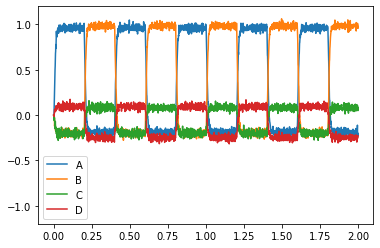

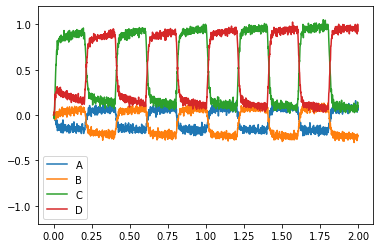

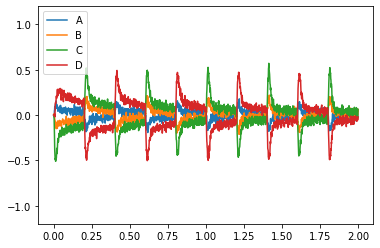

In [3]:
plt.plot(sim.trange(), spa.similarity(sim.data[p_a], vocab))
plt.legend(vocab.keys())
plt.ylim(-1.2,1.2)
plt.show()

plt.plot(sim.trange(), spa.similarity(sim.data[p_b], vocab))
plt.legend(vocab.keys())
plt.ylim(-1.2,1.2)
plt.show()

plt.plot(sim.trange(), spa.similarity(sim.data[p_error], vocab))
plt.legend(vocab.keys())
plt.ylim(-1.2,1.2)
plt.show()

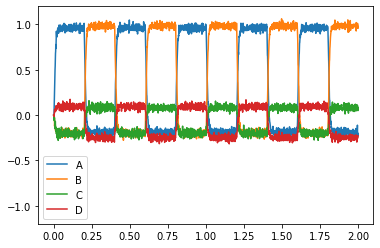

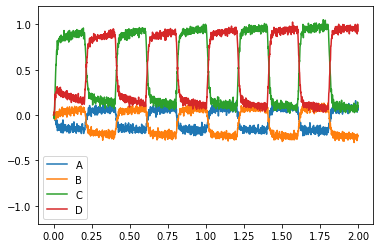

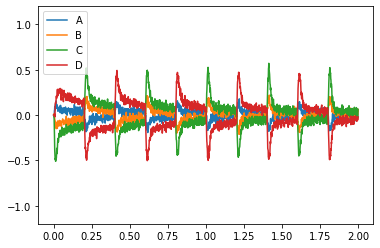

In [4]:
plt.plot(sim.trange(), spa.similarity(sim.data[p_a], vocab))
plt.legend(vocab.keys())
plt.ylim(-1.2,1.2)
plt.show()

plt.plot(sim.trange(), spa.similarity(sim.data[p_b], vocab))
plt.legend(vocab.keys())
plt.ylim(-1.2,1.2)
plt.show()

plt.plot(sim.trange(), spa.similarity(sim.data[p_error], vocab))
plt.legend(vocab.keys())
plt.ylim(-1.2,1.2)
plt.show()